In [333]:
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [10,10]


In [334]:
filename='students.txt'
sdf = pd.read_csv(filename)
sdf

,id,name,phone,sex and age,test number,term 1,term 2,term 3
0,1,Mike,134,m_12,test 1,76,84,87
1,2,Linda,270,f_13,test 1,88,90,73
2,3,Sam,210,m_11,test 1,78,74,80
3,4,Esther,617,f_12,test 1,68,75,74
4,5,Mary,114,f_14,test 1,65,67,64
5,1,Mike,134,m_12,test 2,85,80,90
6,2,Linda,270,f_13,test 2,87,82,94
7,3,Sam,210,m_11,test 2,80,87,80
8,4,Esther,617,f_12,test 2,70,75,78
9,5,Mary,114,f_14,test 2,68,70,63


## Fixing up Students

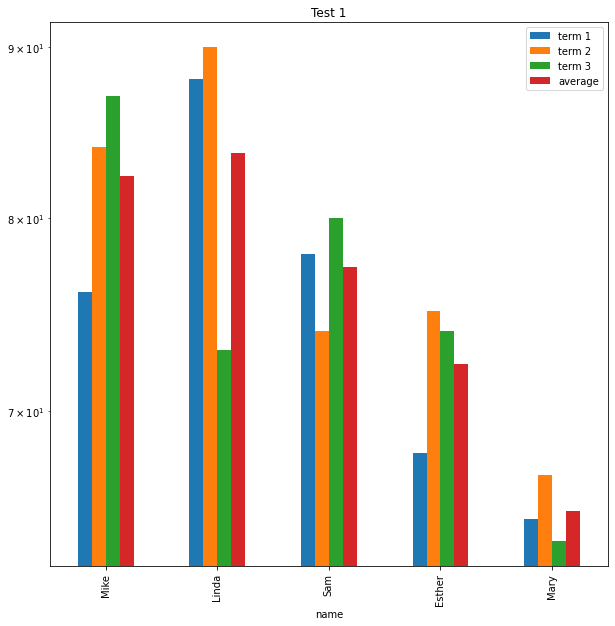

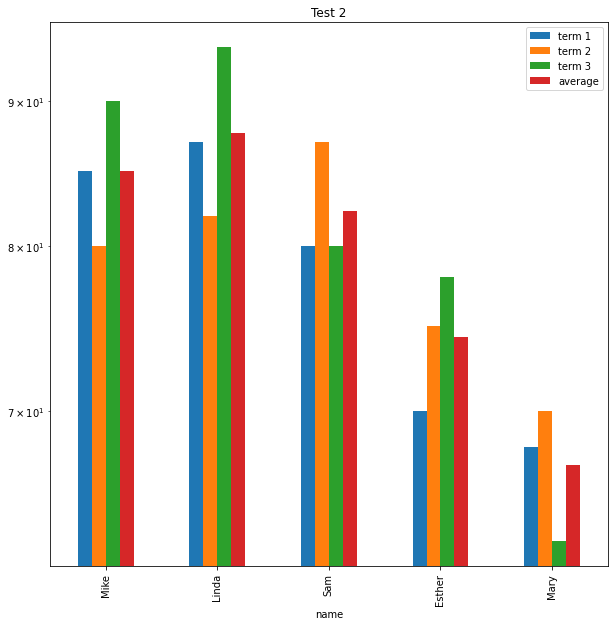

In [335]:
filename='students.txt'
sdf = pd.read_csv(filename)
sdf.rename(columns={'sex and age':'sna'},inplace=True)
sdf[['sex','age']] = sdf.sna.str.split('_',expand=True,)
del sdf['sna']
sdf=sdf[["name",'sex','age','phone','test number','term 1','term 2','term 3']]
sdf['phone']=sdf.phone.astype(str)
sdf['average'] = sdf.mean(axis=1)
sdf1=sdf.iloc[:5]
sdf2=sdf.iloc[5:]
sdf1.plot(x='name',kind='bar',title="Test 1",logy=True)
sdf2.plot(x='name',kind='bar',title="Test 2",logy=True)




**After splitting the data into Test 1 and Test 2 we can see that, generally speaking Mike and Linda were at the top of the class each term and had the highest averages, with Sam, Esther, and Mary following respectively.**

In [336]:
filename='animals.txt'
adf = pd.read_csv(filename)
adf

,Species,habitat,weight,length
0,Alligator,swamp,431 lb,4 ft 2
1,Puma,forest,125 lb,2.2m
2,Bear,forest,88 kg,133 cm


## Fixing up Animals

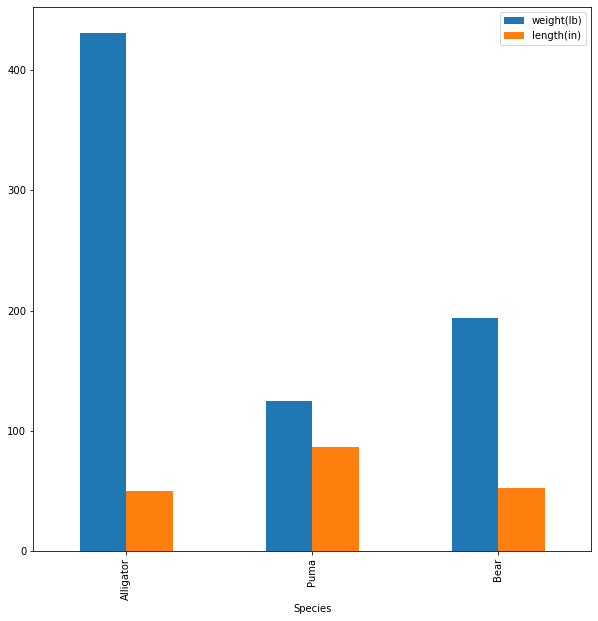

In [337]:
filename='animals.txt'
adf = pd.read_csv(filename)
adf.rename(columns={'weight':'weight(lb)'},inplace=True)
adf.rename(columns={'length':'length(in)'},inplace=True)
adf.iloc[2][2] = 194
adf.iloc[1][2] = 125
adf.iloc[0][2] = 431
adf.iloc[1][3] = 86.64
adf.iloc[0][3] = 50
adf.iloc[2][3] = 52.37
adf.plot(x='Species', kind='bar')


**After making the weight and length columns integers and giving them all a universal measurement type, we can now plot the data. Based on what is shown, I can conclude that, even though the Alligator is the shorter of the three animals, it is the heaviest by far.**

In [338]:
filename='cars.txt'
cdf = pd.read_csv(filename)
cdf

,Manufacturer,year,doors,price,safety rating
0,Mustang,2010,2,$13298,B
1,Ford,2015,4,$10543,A
2,Kia,2018,4,$12998,B-
3,Porsche,2020,2,$123987,A-


## Fixing up Cars

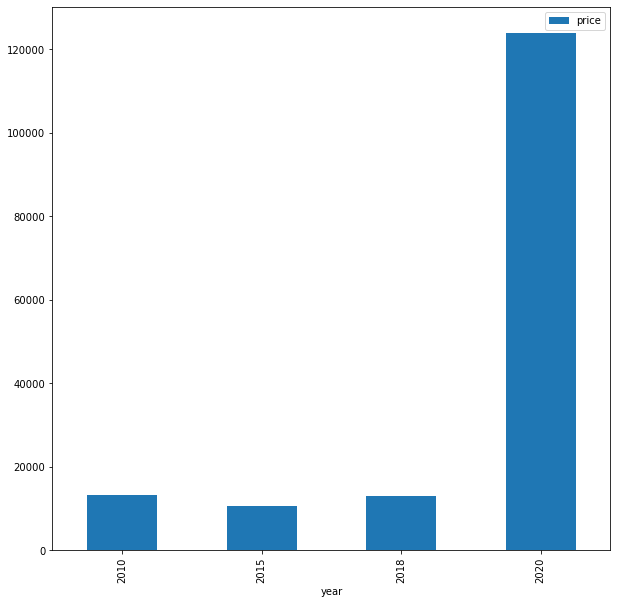

In [339]:
filename='cars.txt'
cdf = pd.read_csv(filename)
cdf['price'] = cdf['price'].str.replace('$', '')
cdf['price']=cdf['price'].astype(float)

cdf.plot(x='year',y='price',kind='bar')

**After removing the dollar sign string value from all of the values in the price column, I converted them to floats so that calculations and graphing can be more easily done. In a larger sample, you would now be able to use this data see there are any correlations between things like amount of doors and price or year and price. In this case there is not because the price of a car from 2010 is higher than the price of a car from 2015**